# In this kernel, we focused on using 2 types of ensemble methods **VOTING** and **STACKING** and chose the best one with the best **AUC score** 

**Steps**:


1.   Import Libraries and Dataset
2.   Getting to know the dataset
3.   EDA
4.   Feature Selection (using statistic test)
5.   Preprocessing
6.   Train/Test split 
7.   Correlation Matrix 
8.   Cross Validation
9.   Modeling  
    9.1. Test Different algorithms and Pick the 5 best ones
    
    9.2. Evaluation Function

    9.3. Hyperparameter Tuning 

    9.4. Trying the voting ensemble method and see the results

    9.5. Trying The stacking ensembling method on different combinaisons

  

10. Final decision and save the best model 












# **1. Import Libraries and Dataset**


In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from mlxtend.classifier import StackingCVClassifier
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
pd.set_option('display.max_columns', 500)
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
data

# **2. Getting to know the dataset**

In [ ]:
print ("DATA SHAPES : ",data.shape)
data.info()

DATA SHAPES :  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

###Change the type of the feature ToTalCharges from Object to Float

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

###Seeing that the feature TotalCharges has 11 missed values 

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###Seeing the Different unique outputs of the categorical features

In [ ]:
def uni_col_val(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')

In [ ]:
uni_col_val(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# **3. EDA**

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


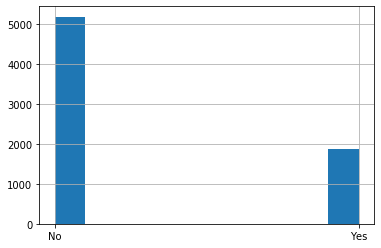

In [ ]:
data['Churn'].hist()
#Not BaLANCED DATASET

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB3D6EEB08>,
      dtype=object)

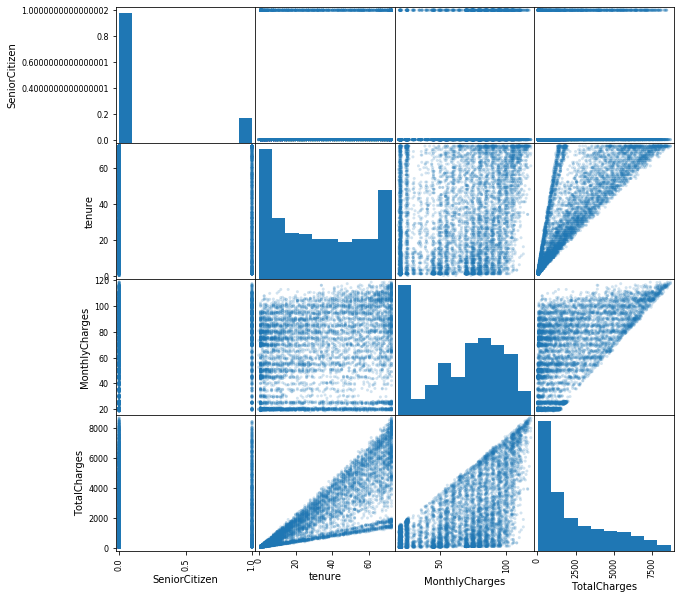

In [ ]:
scatter_matrix(data,alpha=0.2, figsize=(10, 10))

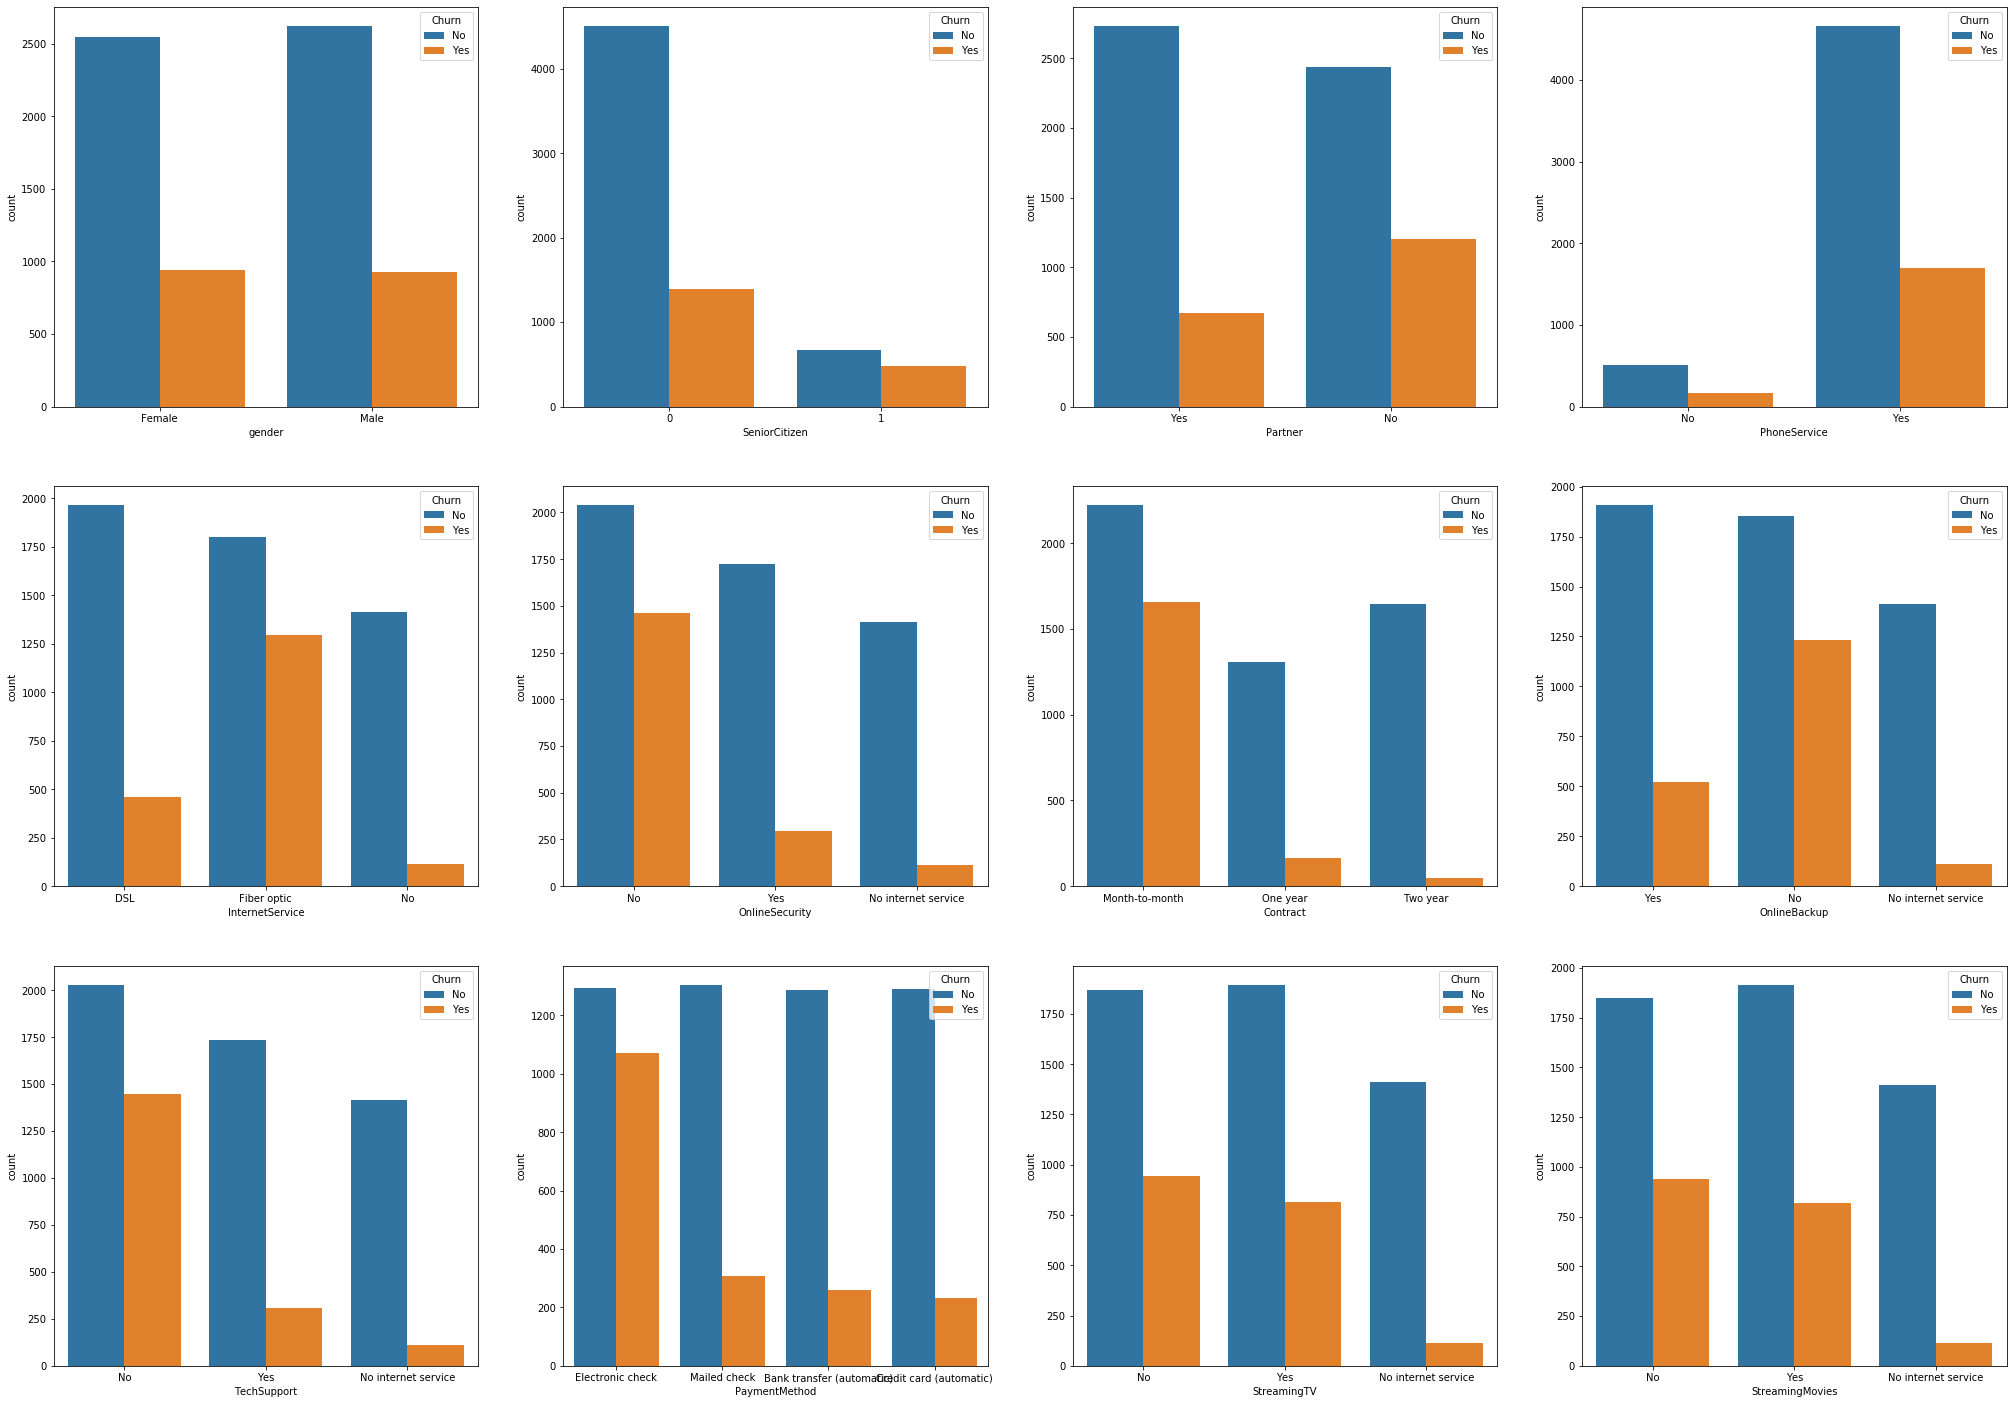

In [ ]:
fig, axes = plt.subplots(nrows = 3,ncols = 4,figsize = (35,25))
sns.countplot(x="gender", hue="Churn", data=data, ax=axes[0][0] )
sns.countplottplot(x="SeniorCitizen", hue="Churn", data=data,ax=axes[0][1] )
sns.countplot(x="Partner", hue="Churn", data=data,ax=axes[0][2] ) 
sns.countplot(x="PhoneService", hue="Churn", data=data,ax=axes[0][3] )

sns.countplot(x="InternetService", hue="Churn", data=data, ax=axes[1][0] )
sns.countplot(x="OnlineSecurity", hue="Churn", data=data,ax=axes[1][1] )
sns.countplot(x="Contract", hue="Churn", data=data,ax=axes[1][2] ) 
sns.countplot(x="OnlineBackup", hue="Churn", data=data,ax=axes[1][3] )


sns.countplot(x="TechSupport", hue="Churn", data=data, ax=axes[2][0] )
sns.countplot(x="PaymentMethod", hue="Churn", data=data,ax=axes[2][1] )
sns.countplot(x="StreamingTV", hue="Churn", data=data,ax=axes[2][2] ) 
sns.countplot(x="StreamingMovies", hue="Churn", data=data,ax=axes[2][3] )

# **4. Feature Selection (using statistic test)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
categorical_features=['gender','Partner','Dependents','PhoneService',  
                        'MultipleLines' ,'InternetService','OnlineSecurity','OnlineBackup',
                        'DeviceProtection','TechSupport', 'StreamingTV' ,'StreamingMovies' ,
                        'Contract','PaperlessBilling','PaymentMethod']


###Statistical Test to determine whether input features are relevant to the outcome to be predicted.

###P-value <= 0.05 significant result
###P-value > 0.05 not significant result

In [ ]:

statistical_significance=[]
for attr in categorical_features:
    data_count=pd.crosstab(data[attr],data["Churn"])
    #print(data_count)
    obs=data_count.values
    #print(obs)
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,4)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
display(statistical_significance)

,Attribute,P-value
0,gender,0.4866
1,Partner,0.0000
2,Dependents,0.0000
3,PhoneService,0.3388
4,MultipleLines,0.0035
5,InternetService,0.0000
6,OnlineSecurity,0.0000
7,OnlineBackup,0.0000
8,DeviceProtection,0.0000
9,TechSupport,0.0000


###We drop the non siginificant features (P-value>0.05)

In [ ]:
data=data.drop(['gender','PhoneService'],axis=1)

# **5. Processing**

In [ ]:

data.Churn=data.Churn.replace('Yes','1')
data.Churn=data.Churn.replace('No','0')
print('churn :\n',data.Churn.value_counts())
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
print('Partner : \n ',data['Partner'].value_counts())

data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0) 
print('Dependents :\n',data.Dependents.value_counts())

data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0) 
print('PaperlessBilling :\n',data.PaperlessBilling.value_counts())

#data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
#print('PhoneService :\n',data.PhoneService.value_counts())


data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
print('MultipleLines :\n',data.MultipleLines.value_counts())

data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
print('Online Backup :\n',data.OnlineBackup.value_counts())


data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
print('Online Security :\n',data.OnlineSecurity.value_counts())


data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
print('DeviceProtection :\n',data.DeviceProtection.value_counts())

data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
print('Tech Support :\n',data.TechSupport.value_counts())


data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
print('StreamingTV  :\n',data.StreamingTV.value_counts())

data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)
print('StreamingMovies  :\n',data.StreamingMovies.value_counts())

churn :
 0    5174
1    1869
Name: Churn, dtype: int64
Partner : 
  0    3641
1    3402
Name: Partner, dtype: int64
Dependents :
 0    4933
1    2110
Name: Dependents, dtype: int64
PaperlessBilling :
 1    4171
0    2872
Name: PaperlessBilling, dtype: int64
MultipleLines :
 0    4072
1    2971
Name: MultipleLines, dtype: int64
Online Backup :
 0    4614
1    2429
Name: OnlineBackup, dtype: int64
Online Security :
 0    5024
1    2019
Name: OnlineSecurity, dtype: int64
DeviceProtection :
 0    4621
1    2422
Name: DeviceProtection, dtype: int64
Tech Support :
 0    4999
1    2044
Name: TechSupport, dtype: int64
StreamingTV  :
 0    4336
1    2707
Name: StreamingTV, dtype: int64
StreamingMovies  :
 0    4311
1    2732
Name: StreamingMovies, dtype: int64


In [ ]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,2,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,2,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


###Encoding

In [ ]:
data_dummied = pd.get_dummies(data,columns=['PaymentMethod','Contract','InternetService'])

In [ ]:
data_dummied['TotalCharges']=data_dummied['TotalCharges'].fillna(data_dummied['TotalCharges'].mean())

###Normalization

In [ ]:


min_max_scaler = MinMaxScaler()
numeric_columns=['tenure','MonthlyCharges','TotalCharges']
data_dummied[numeric_columns]=min_max_scaler.fit_transform(data_dummied[numeric_columns])

In [ ]:
data_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [ ]:
data_dummied

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,0.013889,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,0.472222,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,0,0,1,0,1,0,1,0,0
2,3668-QPYBK,0,0,0,0.027778,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,0.625000,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0.027778,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,0.333333,1,1,0,1,1,1,1,1,0.662189,0.227521,0,0,0,0,1,0,1,0,1,0,0
7039,2234-XADUH,0,1,1,1.000000,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,0,1,0,0,1,0
7040,4801-JZAZL,0,1,1,0.152778,0,1,0,0,0,0,0,1,0.112935,0.037809,0,0,0,1,0,1,0,0,1,0,0
7041,8361-LTMKD,1,1,0,0.055556,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,0,0,1,1,0,0,0,1,0


In [ ]:
data_dummied=data_dummied.drop('customerID',axis=1)

# **6. Train/Test split**

In [ ]:
Y=data_dummied['Churn']
X=data_dummied.drop(['Churn'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X, Y, test_size=0.10, random_state=5,shuffle=True,stratify=Y)


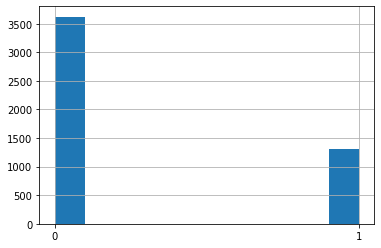

In [ ]:
y_train.hist()

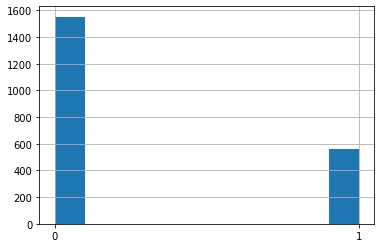

In [ ]:
y_test.hist()

# **7. Correlation Matrix**

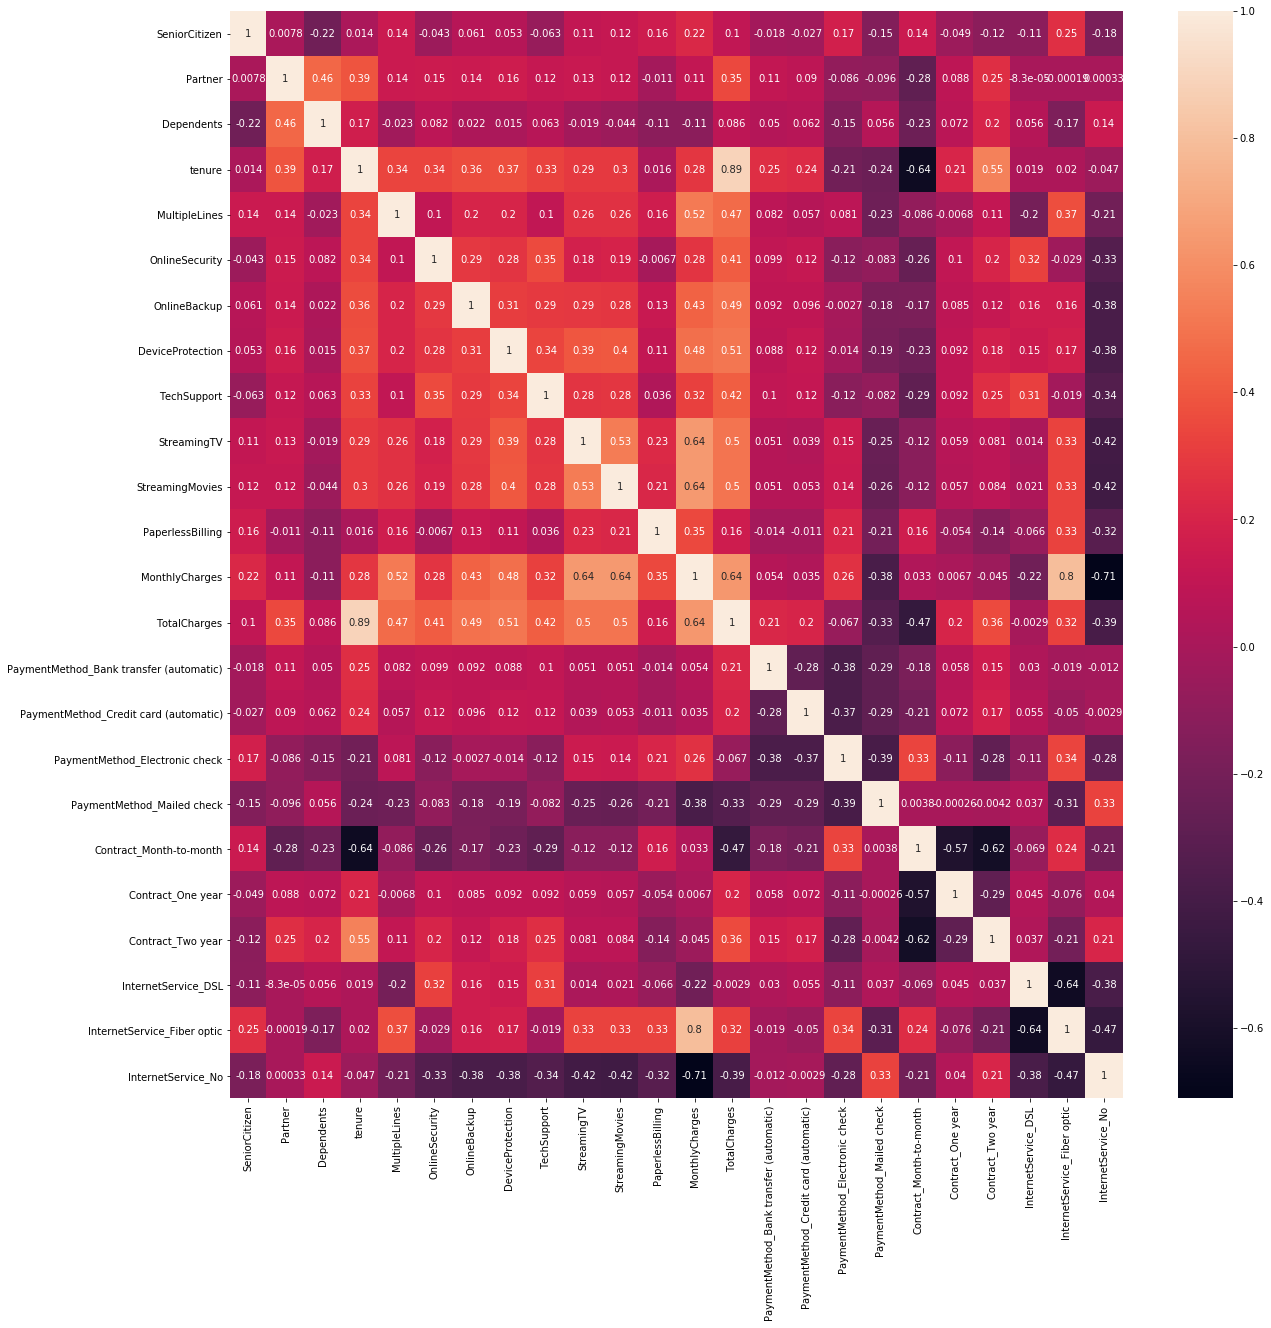

In [ ]:
fig,axe = plt.subplots(figsize = (20,20))
sns.heatmap(X_train.corr(method='spearman'),annot=True,ax=axe)

###Changing the target type from str to int

In [ ]:
y_test=y_test.astype(str).astype(int)
y_train=y_train.astype(str).astype(int)


# **8. Cross Validation**

In [ ]:
#kfold = StratifiedKFold(n_splits=10)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weight=int(y_train.value_counts()[0]/y_train.value_counts()[1])
class_weight

2

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1], y=6836    1
4673    1
180     1
207     1
2523    0
       ..
6881    0
2906    0
2823    0
6643    0
1473    1
Name: Churn, Length: 6338, dtype: int32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


#**9 Modeling**

## **9.1 Test Different algorithms and Pick the 5 best ones** 

In [ ]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(ExtraTreesClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state,class_weight=class_weights))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state,class_weight=class_weights))


In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))

   CrossValMeans  CrossValerrors           Algorithm
0       0.819269        0.013547                 SVC
1       0.657266        0.016472        DecisionTree
2       0.760283        0.010341            AdaBoost
3       0.824111        0.006380        RandomForest
4       0.791083        0.013547          ExtraTrees
5       0.844802        0.006754    GradientBoosting
6       0.843839        0.011605             Xgboost
7       0.776513        0.013359         KNeighboors
8       0.842366        0.012548  LogisticRegression


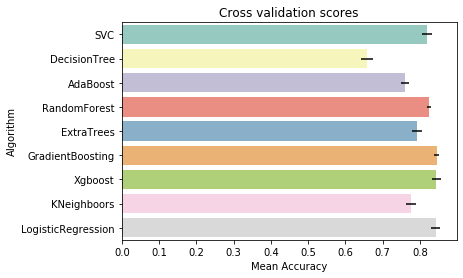

In [ ]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## **9.2 Evaluation Function**

In [ ]:
def evaluation(model,x_test,y_test):
    

    print("Test :",roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print('Train   :',roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    #print(roc_auc_score(y_test, y_pred))
    axe.set_xlabel('Actual')
    axe.set_ylabel('Predicted')
    print(classification_report(y_test,model.predict_proba(X_train)[:,1])))
    
    

## **9.3. Hyperparameter tuning**

# GradientBoosting

In [ ]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                 
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              
              }
gsGBC=RandomizedSearchCV(estimator=GBC,param_distributions=gb_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)
 

gsGBC.fit(X_train,y_train)

In [ ]:
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
evaluation(GBC_best ,X_test,y_test)

### RandomForrest

In [ ]:
RFC = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))
#class_weight_dict = )
#
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.680627147766323,
                                                            1: 1.8840665873959572}),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [ ]:
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

0.8433193928329551

Test : 0.8607922284392873
Train   : 0.9220385086074098
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       518
           1       0.55      0.78      0.64       187

    accuracy                           0.77       705
   macro avg       0.73      0.77      0.74       705
weighted avg       0.81      0.77      0.78       705



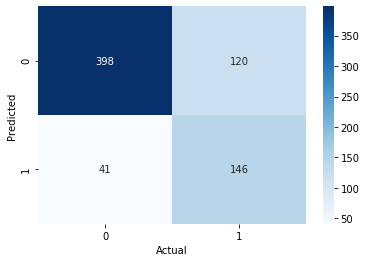

In [ ]:
evaluation(RFC_best,X_test,y_test)

### SVM

In [ ]:
SVMC = SVC(probability=True,class_weight=dict(enumerate(class_weights)))
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 100,200]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(class_weight={0: 0.680627147766323,
                                         1: 1.8840665873959572},
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [1, 10, 100, 200], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=1)

In [ ]:
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

0.8369517469600485

Test : 0.8526985732868086
Train   : 0.840638164964798
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       518
           1       0.46      0.84      0.59       187

    accuracy                           0.69       705
   macro avg       0.69      0.74      0.67       705
weighted avg       0.79      0.69      0.71       705



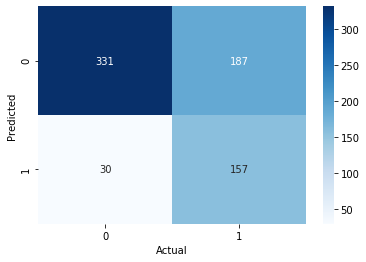

In [ ]:
evaluation(gsSVMC,X_test,y_test)

### XGBOOST

In [ ]:
class_weight=int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [ ]:
XGBoost=xgboost.XGBClassifier(scale_pos_weight=class_weight)
xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}
gsXGoost=RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)


gsXGoost.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(scale_pos_weight=2), n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=3, scoring='roc_auc')

In [ ]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.8478183078262893

Test : 0.8656029979559392
Train   : 0.8602379372658143
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       518
           1       0.58      0.75      0.65       187

    accuracy                           0.79       705
   macro avg       0.74      0.78      0.75       705
weighted avg       0.81      0.79      0.80       705



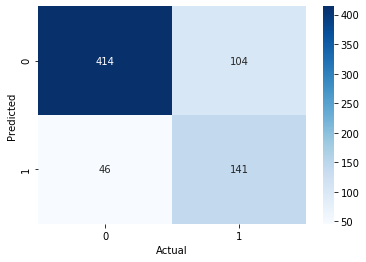

In [ ]:
evaluation(XGBOOST_best,X_test,y_test)

### LogisticRegression

In [ ]:
logreg = LogisticRegression(class_weight=dict(enumerate(class_weights)))
logreg_param_grid={
    'C':[100, 10, 1.0, 0.1, 0.01] ,
    'penalty':['l2']
}
gslogreg=GridSearchCV(logreg,param_grid = logreg_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)
gslogreg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.680627147766323,
                                                        1: 1.8840665873959572}),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2']},
             scoring='roc_auc', verbose=1)

In [ ]:
LogReg_best = gslogreg.best_estimator_

# Best score
gslogreg.best_score_

0.8417888750272706

Test : 0.8631614808085397
Train   : 0.8461857100244758
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       518
           1       0.53      0.84      0.65       187

    accuracy                           0.76       705
   macro avg       0.73      0.79      0.74       705
weighted avg       0.82      0.76      0.77       705



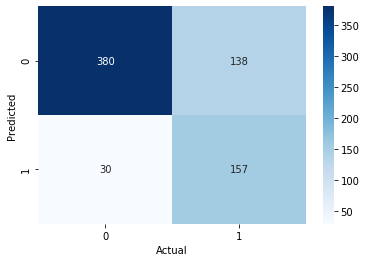

In [ ]:
evaluation(LogReg_best,X_test,y_test)

## **9.4. Trying the voting ensemble method and see the results**

In [ ]:
votingC = VotingClassifier(estimators=[('gbc',GBC_best), ('rfc', RFC_best),
('xgboost',XGBOOST_best),('logreg',LogReg_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

Test : 0.8681167798814858
Train   : 0.8800762367660819
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       518
           1       0.58      0.74      0.65       187

    accuracy                           0.79       705
   macro avg       0.74      0.77      0.75       705
weighted avg       0.81      0.79      0.79       705



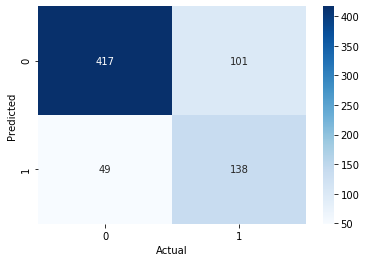

In [ ]:
evaluation(votingC,X_test,y_test)

## **9.5.Trying The stacking ensembling method on different combinaisons**

In [ ]:
scv=StackingCVClassifier(classifiers=[GBC_best,RFC_best,XGBOOST_best,LogReg_best],meta_classifier= XGBOOST_best,random_state=42)

In [ ]:
scv2=StackingCVClassifier(classifiers=[GBC_best,RFC_best,XGBOOST_best,LogReg_best],meta_classifier= RFC_best,random_state=42)

In [ ]:
scv3=StackingCVClassifier(classifiers=[RFC_best,XGBOOST_best,LogReg_best,SVMC_best],meta_classifier= RFC_best,random_state=42)

Test : 0.8340955546837899
Train   : 0.8502250940828909
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       518
           1       0.58      0.70      0.63       187

    accuracy                           0.78       705
   macro avg       0.73      0.76      0.74       705
weighted avg       0.80      0.78      0.79       705



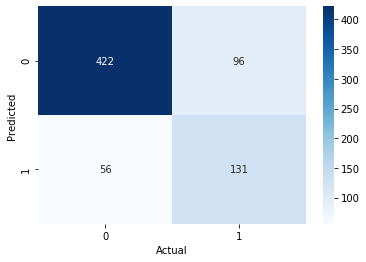

In [ ]:
scv.fit(X_train,y_train)
evaluation(scv,X_test,y_test)

Test : 0.8211137034666447
Train   : 0.829534391842472
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       518
           1       0.53      0.85      0.66       187

    accuracy                           0.76       705
   macro avg       0.73      0.79      0.74       705
weighted avg       0.83      0.76      0.78       705



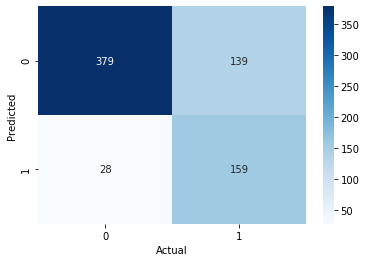

In [ ]:
scv3.fit(X_train,y_train)
evaluation(scv3,X_test,y_test)

Test : 0.8352208205149382
Train   : 0.8500938913541807
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       518
           1       0.57      0.78      0.65       187

    accuracy                           0.78       705
   macro avg       0.74      0.78      0.75       705
weighted avg       0.82      0.78      0.79       705



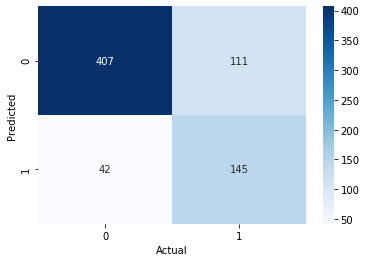

In [ ]:
scv2.fit(X_train,y_train)
evaluation(scv2,X_test,y_test)

In [ ]:
scv4=StackingCVClassifier(cv=2,classifiers=[RFC_best,SVMC_best,XGBOOST_best,LogReg_best],meta_classifier= GBC_best,random_state=42)

Test : 0.823008073008073
Train   : 0.8309093709011118
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       518
           1       0.58      0.71      0.64       187

    accuracy                           0.79       705
   macro avg       0.73      0.76      0.74       705
weighted avg       0.80      0.79      0.79       705



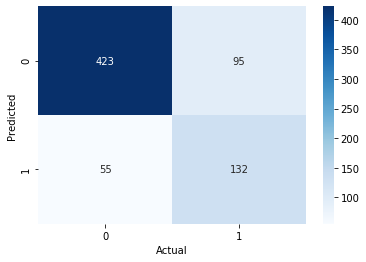

In [ ]:
scv4.fit(X_train,y_train)
evaluation(scv4,X_test,y_test)

# **10. Final decision and save the best model** 

###WE decided to pick the model generated by the voting method and save it

In [ ]:
import pickle
pickle.dump(votingC, open("best_model_Voting", 'wb'))